In [1]:
%config InlineBackend.figure_format = "svg"

from src.networks.nodes import DiscreteNode
# from src.trees.nodes import TreeBeliefNode, TreeObservationNode, Tree
from src.networks.dn import DecisionNetwork as DN

# Decision Networks

## Creating the decision network structure

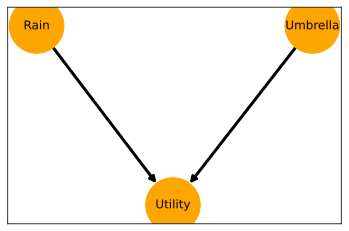

In [2]:
# Create the nodes for the network
rain = DiscreteNode("Rain", node_type=DN.state_type, value_space=[0, 1])
umbrella = DiscreteNode("Umbrella", node_type=DN.action_type, value_space=[0, 1])
utility = DiscreteNode("Utility", node_type=DN.state_type, value_space=[0, 1])

# Create the network structure
dn = DN()
dn.add_nodes([rain, umbrella, utility])
dn.add_edges([("Rain", "Utility"), ("Umbrella", "Utility")])
dn.draw()

## Populate the Decision Network with data

In [3]:
# Add data for node Rain
data = {"Rain": [0,1], "Prob": [0.8, 0.2]}
dn.add_pt("Rain", data)

# Add data for node utility
data = {"Rain": [0,0,0,0,1,1,1,1], "Umbrella": [0,0,1,1,0,0,1,1], "Utility": [0,1,0,1,0,1,0,1], "Prob":[0,1,1,0,1,0,0,1]}
dn.add_pt("Utility", data)

In [4]:
dn.get_nodes_by_type(DN.action_type)

['Umbrella']

## Classical query for the best decision

In [5]:
dn.initialize()
dn.query_decision(query="Utility", evidence={"Rain": 1}, n_samples=100)

{'Umbrella': 1}

## Quantum-Classical query for the best decision

In [6]:
# dn.query_decision(query="Utility", evidence={"Rain": 1}, n_samples=100, quantum=True)

# Creating a dynamic decision network

## Example: Tiger problem

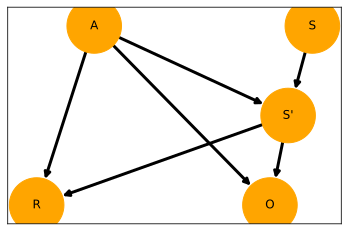

In [7]:
# Create nodes
s0 = DiscreteNode("S", node_type=DN.state_type, value_space=[0,1])
s1 = DiscreteNode("S\'", node_type=DN.state_type, value_space=[0,1])
o1 = DiscreteNode("O", node_type=DN.observation_type, value_space=[0,2])
r1 = DiscreteNode("R", node_type=DN.reward_type, value_space=[-100,-1,10])
a0 = DiscreteNode("A", node_type=DN.action_type, value_space=[0,1,2])

# Create the initial DDN structure
ddn = DN()
ddn.add_nodes([s0, s1, o1, r1, a0])
ddn.add_edges([
    ("S", "S\'"), 
    ("A", "S\'"), 
    ("A", "R"),
    ("A", "O"),
    ("S\'", "O"), 
    ("S\'", "R")
])
ddn.draw()

In [8]:
# Add data for node State 0
data = {
    "S": [0,1], 
    "Prob": [0.5,0.5]
}
ddn.add_pt("S", data)

# Add data for node State 1
data = {
    "S": [0,0,0,0,0,0,1,1,1,1,1,1], 
    "A": [0,0,1,1,2,2,0,0,1,1,2,2], 
    "S\'": [0,1,0,1,0,1,0,1,0,1,0,1], 
    "Prob": [1,0,0.5,0.5,0.5,0.5,0,1,0.5,0.5,0.5,0.5]
}
ddn.add_pt("S\'", data)

# Add data for node Evidence
data = {
    "A": [0,0,0,0,1,1,1,1,2,2,2,2], 
    "S\'": [0,0,1,1,0,0,1,1,0,0,1,1], 
    "O": [0,1,0,1,0,1,0,1,0,1,0,1], 
    "Prob": [0.85,0.15,0.15,0.85,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
}
ddn.add_pt("O", data)

# Add data for node Reward
data = {
    "A": [0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2], 
    "S\'": [0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1], 
    "R": [-100,-1,10,-100,-1,10,-100,-1,10,-100,-1,10,-100,-1,10,-100,-1,10], 
    "Prob": [0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0]
}
ddn.add_pt("R", data)

# Initialize ddn
ddn.initialize()

In [9]:
# Define tree parameters
# horizon = 1
# discount = 0.75
# action_space = [0,1,2]
# observation_space = [0,1]

# Build the tree
# tree = Tree(horizon, discount, action_space, observation_space)

In [10]:
# ddn.node_map["S"].get_pt()

In [11]:
# tree.pomdp_lookahead(ddn, verbose=True)

In [12]:
# time = 10
# tree.online_planning(ddn, time, verbose=True)